## Dependancies

In [1]:
import pandas as pd
import datetime
import warnings
warnings.filterwarnings("ignore")

## Import CSV's
- Fake CSV
- True CSV

In [2]:
fake_news = pd.read_csv('../data/clean-datasets/fake_news.csv')

In [3]:
fake_news.head()

,title,text,subject,date,year
0,JUST IN: CROOKED DOJ OFFICIAL Didn’t Reveal Th...,We ve been covering the curious case of DOJ of...,politics,2018-02-14,2018
1,POLITICS FIRST: LEFTIST PARENTS Of Former Comb...,The heartbreaking story of two parents who put...,politics,2018-02-15,2018
2,TWO HIGH SCHOOL JROTC Members Tell INCREDIBLE ...,ABC News When two Marjory Stoneman Douglas Hi...,politics,2018-02-15,2018
3,MEDIA PROMOTES Fake News That Shooter Connecte...,The mainstream media is guilty of fake news wh...,politics,2018-02-15,2018
4,"WHAT’S WRONG WITH PELOSI? Nancy Stutters, Stam...",What s wrong with Pelosi? Nancy Pelosi is supp...,politics,2018-02-15,2018


In [4]:
true_news = pd.read_csv('../data/clean-datasets/true_news.csv')

In [5]:
true_news.head()

,title,text,subject,date,year
0,Trump sued in Kentucky by three who say he inc...,"LOUISVILLE, Ky. (Reuters) - Three people who c...",politicsNews,2016-04-01,2016
1,"In record year for political ads, media buyers...",(Reuters) - Media buyers expect record politic...,politicsNews,2016-04-01,2016
2,"Obama, Republicans urge Trump to soften tone",WASHINGTON (Reuters) - Donald Trump is facing ...,politicsNews,2016-04-01,2016
3,State Department says halts review of Clinton ...,WASHINGTON (Reuters) - The U.S. State Departme...,politicsNews,2016-04-01,2016
4,Obama: Trump doesn't know much about foreign p...,WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,2016-04-01,2016


## Fake News - Word CLoud

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
?WordCloud

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

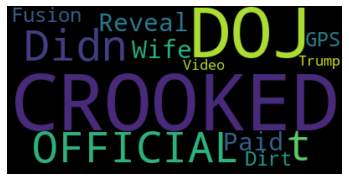

In [8]:
# Start with one review:
text = fake_news.title[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

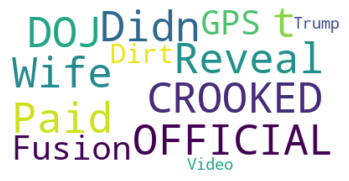

In [9]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

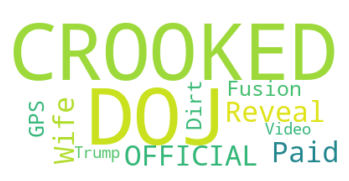

In [10]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["t", "Didn"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

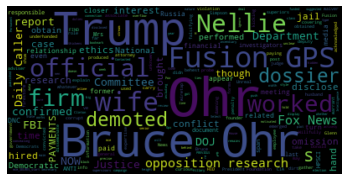

In [11]:
# Start with one review:
text = fake_news.text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

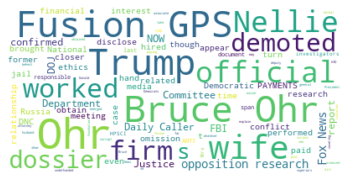

In [12]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

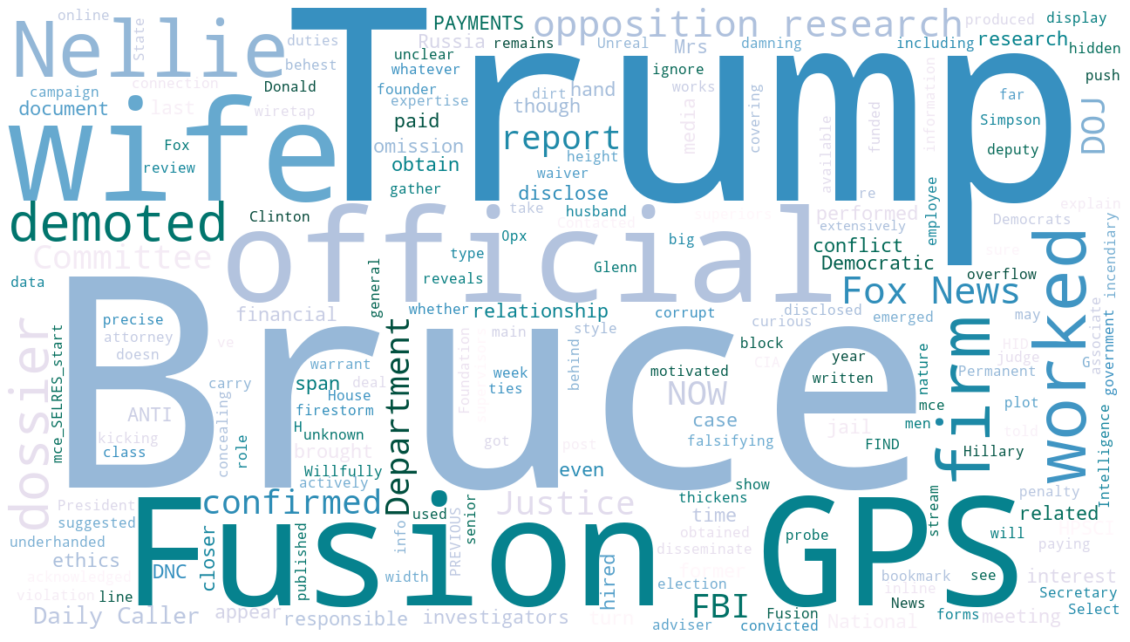

In [13]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["0hr", "Ohr","s", "didn", "t", "u"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, width=1280, height=720, background_color="white", colormap='PuBuGn').generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("../data-visualisations/wordclouds/fake_news_wc(demo).png", format="png")
plt.show()

#### Word Cloud Img - Fake News

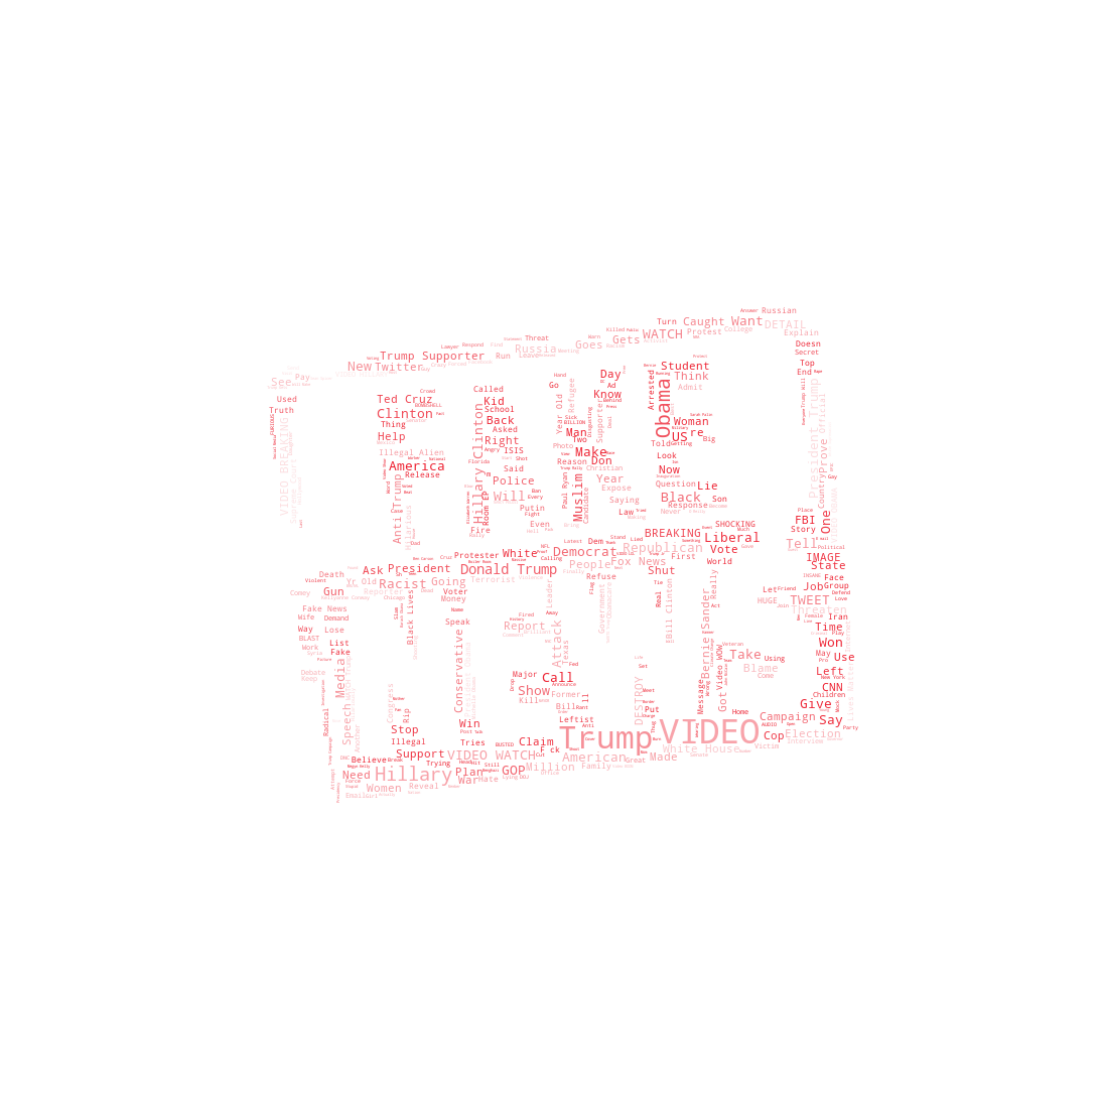

In [14]:
# Generate a word cloud image
mask = np.array(Image.open("../data-visualisations/_mask/fake-news-mask.png"))
wordcloud = WordCloud(stopwords=stopwords, width = 3000, height = 2000, background_color="white", mode="RGBA", max_words=2000, mask=mask).generate(''.join(fake_news['title']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
#plt.savefig("../data-visualisations/wordclouds/fake_news_wc_img.png", format="png")

plt.show()

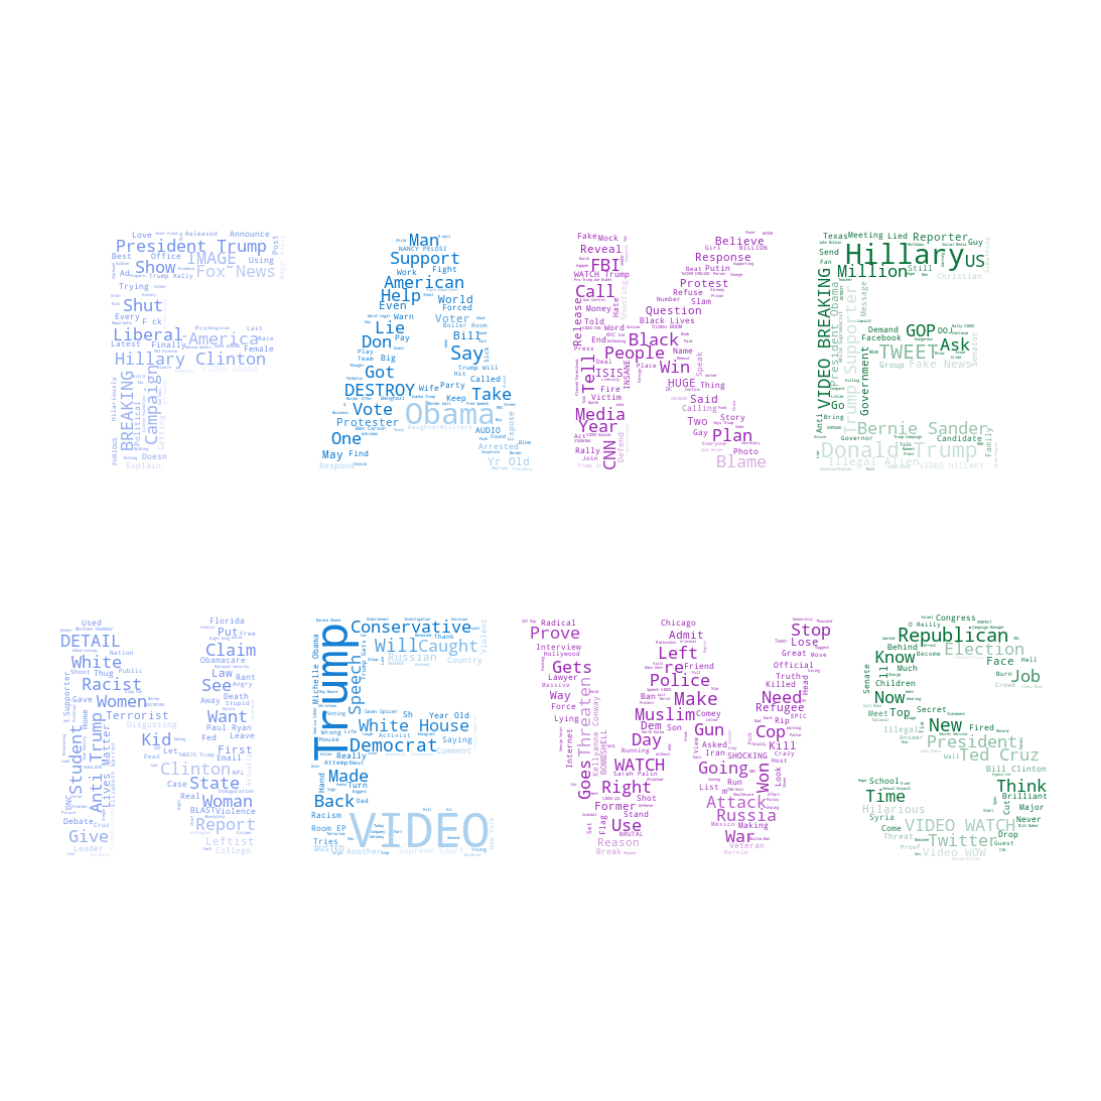

In [15]:
# Generate a word cloud image
mask = np.array(Image.open("../data-visualisations/mask/MaskDesign002.png"))
wordcloud = WordCloud(stopwords=stopwords, width=1280, height=720, background_color="white", mode="RGBA", max_words=2000, mask=mask).generate(''.join(fake_news['title']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("../data-visualisations/wordclouds/fake_news_wc_img2.png", format="png")

plt.show()

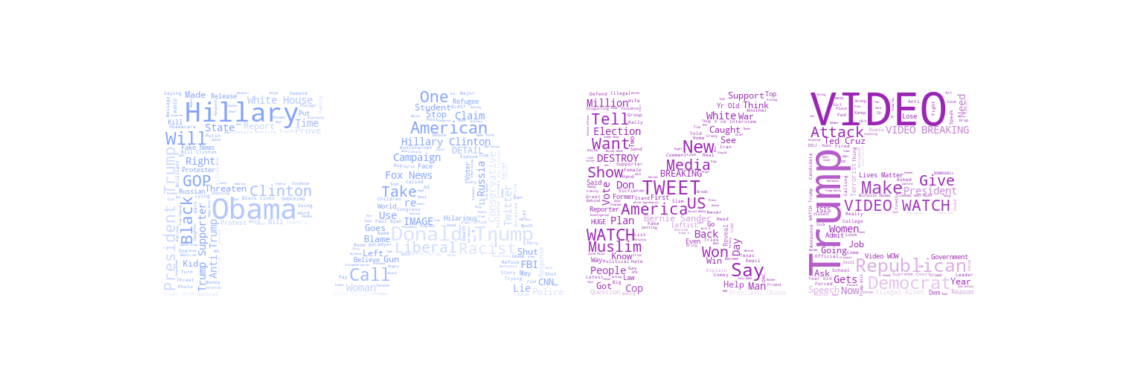

In [16]:
# Generate a word cloud image
mask = np.array(Image.open("../data-visualisations/mask/MaskDesign004.png"))
wordcloud = WordCloud(stopwords=stopwords, width=1280, height=720, background_color="white", mode="RGBA", max_words=1700, mask=mask).generate(''.join(fake_news['title']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("../data-visualisations/wordclouds/fake_news_wc_img3.png", format="png")

plt.show()

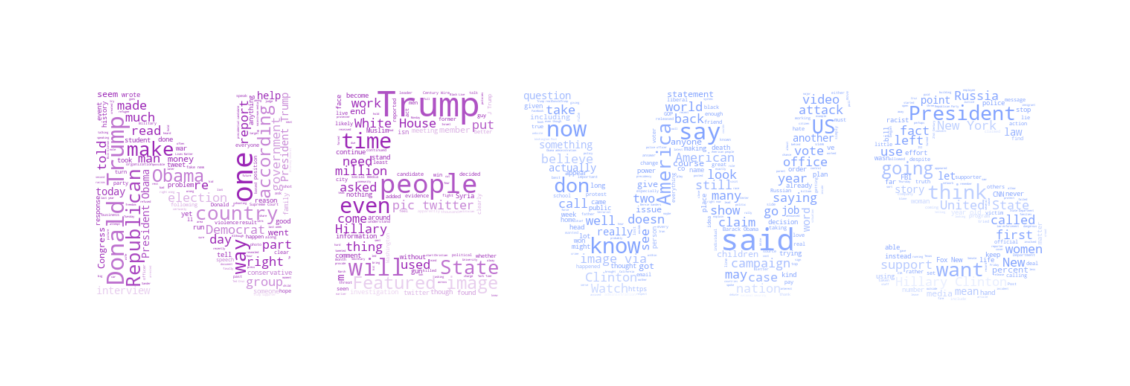

In [17]:
# Generate a word cloud image
mask = np.array(Image.open("../data-visualisations/mask/MaskDesign007.png"))
wordcloud = WordCloud(stopwords=stopwords, width=1280, height=720, background_color="white", mode="RGBA", max_words=1700, mask=mask).generate(''.join(fake_news['text']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("../data-visualisations/wordclouds/fake_news_wc_img4.png", format="png")

plt.show()

## True News - Word Cloud

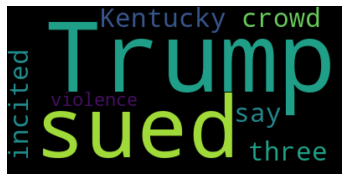

In [18]:
# Start with one review:
text = true_news.title[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

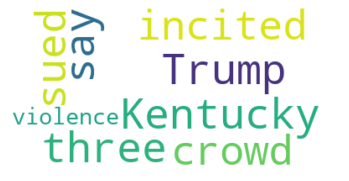

In [19]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

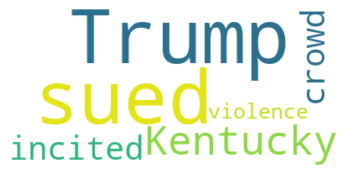

In [20]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["three", "say"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

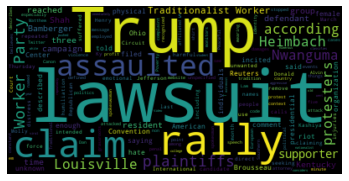

In [21]:
# Start with one review:
text = true_news.text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

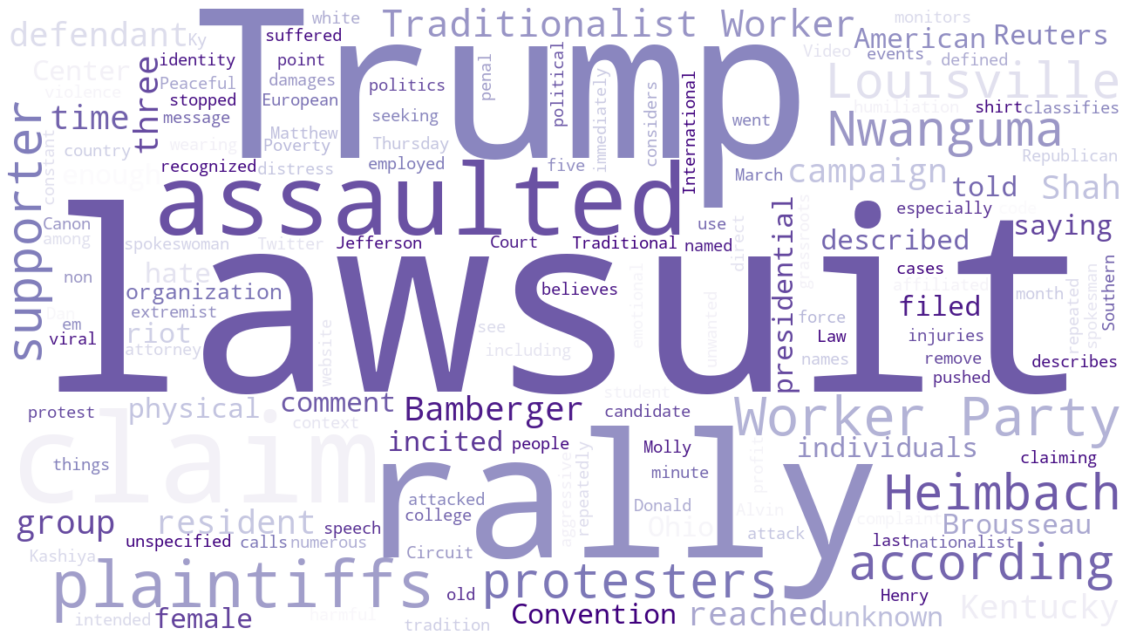

In [22]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["years", "U", "S", "year", "s", "t", "say", "N", "says", "said"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, width=1280, height=720, background_color="white", colormap='Purples').generate(text)

# Display the generated image - matplotlib way
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("../data-visualisations/true_news_wc(demo).png", format="png")
plt.show()

#### Word Cloud Img - Real News

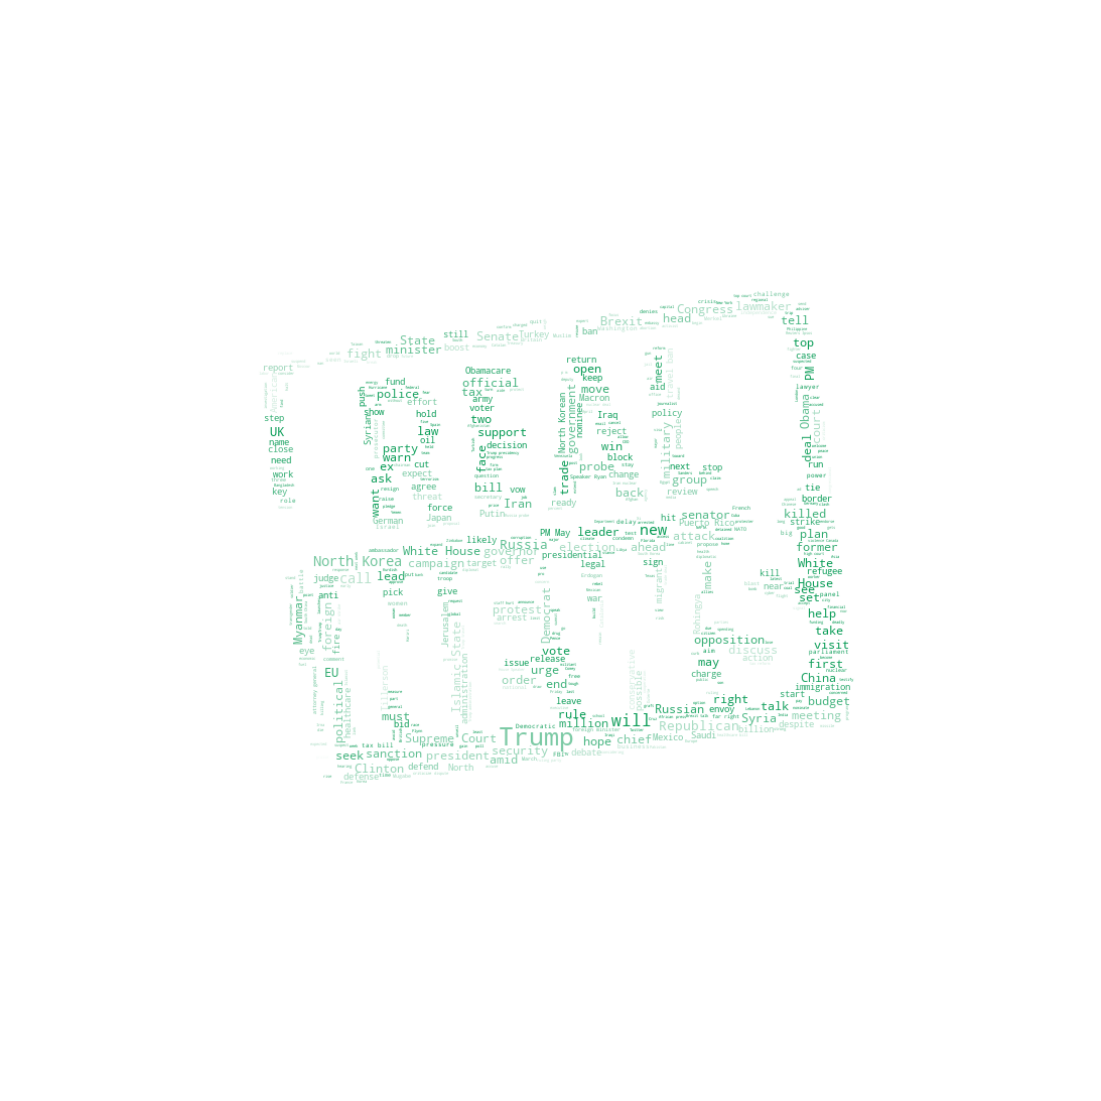

In [23]:
# Generate a word cloud image
mask = np.array(Image.open("../data-visualisations/_mask/real-news-mask.png"))
wordcloud = WordCloud(stopwords=stopwords, width = 3000, height = 2000, background_color="white", mode="RGBA", max_words=2000, mask=mask).generate(''.join(true_news['title']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
#plt.savefig("../data-visualisations/real_news_wc_img.png", format="png")

plt.show()

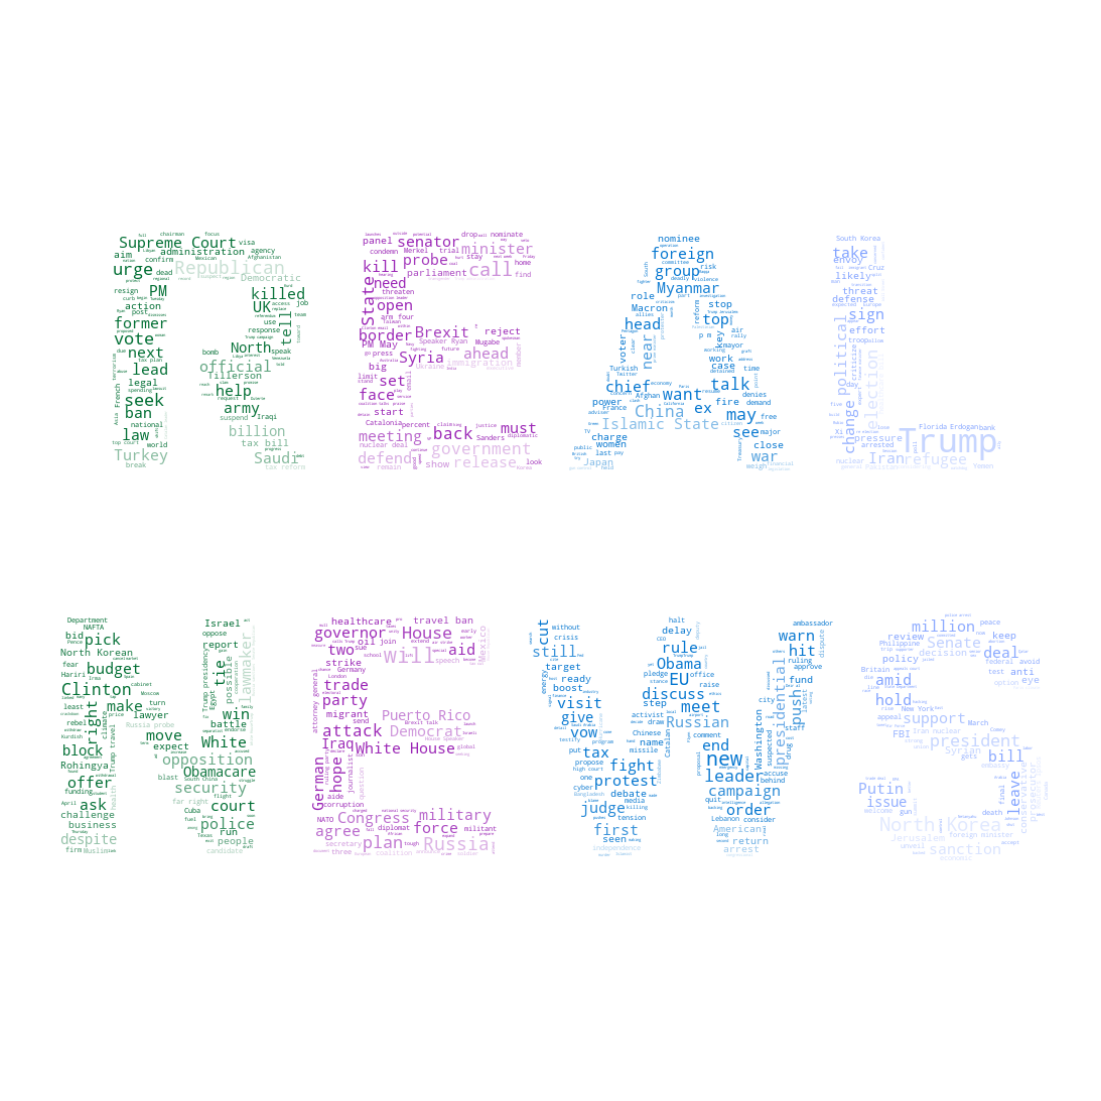

In [24]:
# Generate a word cloud image
mask = np.array(Image.open("../data-visualisations/mask/MaskDesign003.png"))
wordcloud = WordCloud(stopwords=stopwords, width=1280, height=720, background_color="white", mode="RGBA", max_words=1700, mask=mask).generate(''.join(true_news['title']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("../data-visualisations/wordclouds/real_news_wc_img2.png", format="png")

plt.show()

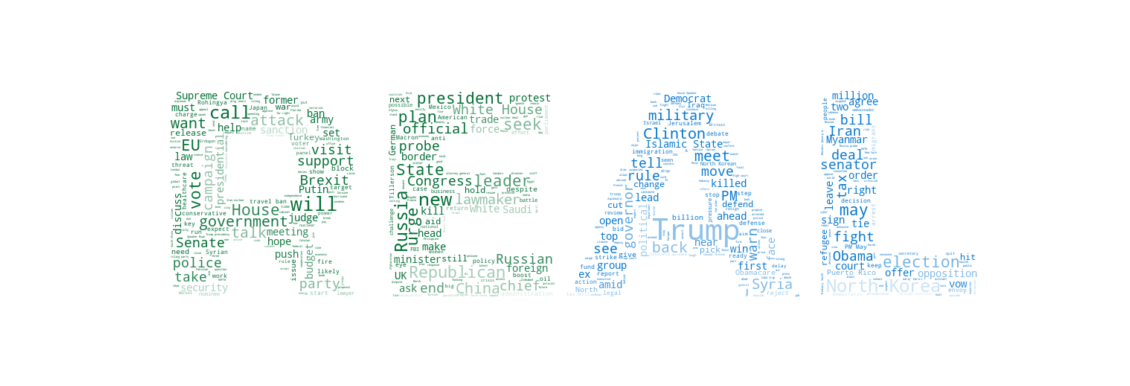

In [25]:
# Generate a word cloud image
mask = np.array(Image.open("../data-visualisations/mask/MaskDesign005.png"))
wordcloud = WordCloud(stopwords=stopwords, width=1280, height=720, background_color="white", mode="RGBA", max_words=1700, mask=mask).generate(''.join(true_news['title']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("../data-visualisations/wordclouds/real_news_wc_img3.png", format="png")

plt.show()

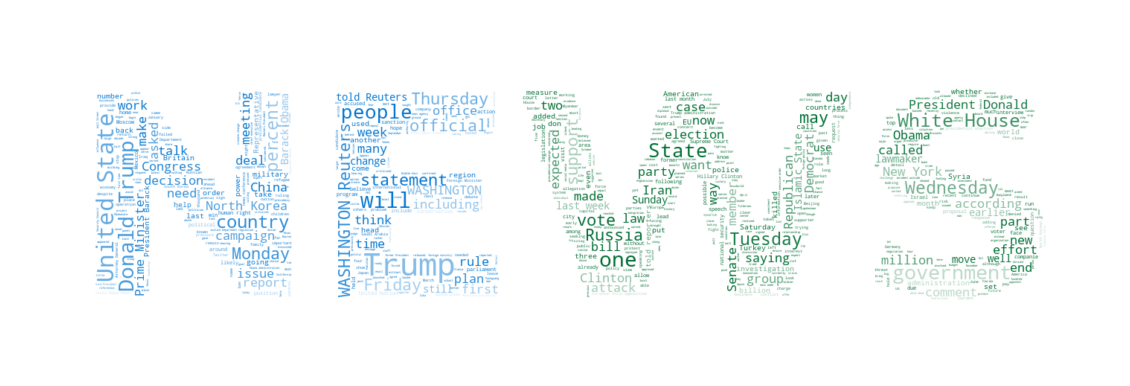

In [26]:
# Generate a word cloud image
mask = np.array(Image.open("../data-visualisations/mask/MaskDesign006.png"))
wordcloud = WordCloud(stopwords=stopwords, width=1280, height=720, background_color="white", mode="RGBA", max_words=1700, mask=mask).generate(''.join(true_news['text']))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("../data-visualisations/wordclouds/real_news_wc_img4.png", format="png")

plt.show()